# CURRENT DOUBTS/ISSUES-TO-SOLVE SECTION:

Regarding Data Cleaning:
    - At this point, we have not removed any outliers from any of the variables; discuss methodology for that;
    - We haven't filled in any of the missing values either; discuss methodology for that;

# TO DO LIST:

- Deal with outliers
- Further cleaning, when needed
- Transform all dates in nr months passed since
- Add mapas Joana

In [1]:
#####

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import os
from datetime import date, datetime
import warnings
warnings.filterwarnings('ignore')
sns.set()
from pandas_profiling import ProfileReport

In [3]:
#imports dataset
path = os.path.join("donors.csv")
df = pd.read_csv(path)

In [4]:
#see head chunck of dataset
df.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A


In [5]:
df.tail()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
95407,95407,2016-01-01,ASE,1,AK,99504,,,NaN,0,...,25.000000,184568,0,L,1,G,X,X,X,C
95408,95408,2016-01-01,DCD,1,TX,77379,,,1970-01-01,0,...,20.000000,122706,1,L,1,F,X,X,X,A
95409,95409,2015-01-01,MBC,1,MI,48910,,,1958-01-01,0,...,8.285714,189641,1,L,3,E,X,X,X,B
95410,95410,2006-01-01,PRV,0,CA,91320,,,1960-05-01,0,...,12.146341,4693,1,L,4,F,X,X,X,A
95411,95411,2008-01-01,MCC,2,NC,28409,,,1938-01-01,0,...,96.794872,185114,1,L,1,G,C,1,C,C


In [6]:
#setscontrolN as index for easy donor ID
df = df.set_index('CONTROLN', drop = True).sort_index(axis = 0)

# DATA CLEANING & EXPLORATION

The dataset has, in total, 474 variables. As a way of looking and cleaning the data more easily, we will here follow the approach of dividing the dataset in logical parts (see metadata file for additional info.):

**1) Personal / Demografic Info.**
    (variables ODATEDW to HIT + DATASRCE to GEOCODE + HPHONE_D + GEOCODE2)

**2) Personal preferences / interests** (variables MBCRAFT to PUBOPP + COLLECT1 to LIFESRC)

**3) Promotion / Giving history file** (ADATA_2 to AVGGIFT + RFA_2R to MDMAUD_A + PEP Star RFA Status)

**4) Neighborhood information - Data from Census** (POP901 to AC2)

# 1) Personal / Demografic Info.

In [7]:
#gets variables corresponding to personal / Demographic Data
df_personal = df[list(df.loc[:,'ODATEDW' : 'HIT']) + list(df.loc[:,'DATASRCE':'GEOCODE']) + list(['HPHONE_D']) + list(['GEOCODE2'])]

#checks varaibles
df_personal.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD',
       'DOMAIN', 'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18',
       'NUMCHLD', 'INCOME', 'GENDER', 'WEALTH1', 'HIT', 'DATASRCE', 'MALEMILI',
       'MALEVET', 'VIETVETS', 'WWIIVETS', 'LOCALGOV', 'STATEGOV', 'FEDGOV',
       'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'GEOCODE', 'HPHONE_D',
       'GEOCODE2'],
      dtype='object')

In [8]:
df_personal.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,HPHONE_D,GEOCODE2
CONTROLN,,,,,,,,,,,,,,,,,,,,,
1,2010-01-01,,1,TX,77096,,,1935-09-01,0,,...,0,0,0,12,,,9.0,05,0,A
2,2010-01-01,,0,CA,91320,,,1946-09-01,0,,...,0,0,0,,,,6.0,,0,A
4,2010-01-01,,1,KY,42701,,,1978-05-01,0,,...,0,0,0,,,,8.0,12,1,C
5,2009-01-01,,0,IN,47240,B,,1930-01-01,0,,...,0,0,0,12,,,NaN,,0,D
7,2007-01-01,ASC,0,MN,55102,B,,NaN,0,,...,0,0,0,,,,9.0,,0,A


Based on the metadata documentation, we will start by dropping the following variables: OSOURCE, TCODE, NOEXCH, RECINHSE, RECP3, RECPGVG, RECSWEEP, DATASRCE. These correspond to titles, in house flags, origin of data or other information not necessary and/or not fit for clustering analysis, thus clearly not bringing us any useful information for the goals of the study. Please note that these variables may or may not be recovered later on, for further goals of the study.

In [9]:
df_personal.drop(['OSOURCE', 'TCODE', 'MAILCODE', 'NOEXCH', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'DATASRCE'], axis = 1, inplace = True)

In [10]:
#checks data info
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 1 to 191779
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ODATEDW   95412 non-null  object 
 1   STATE     95412 non-null  object 
 2   ZIP       95412 non-null  object 
 3   PVASTATE  95412 non-null  object 
 4   DOB       71529 non-null  object 
 5   MDMAUD    95412 non-null  object 
 6   DOMAIN    95412 non-null  object 
 7   HOMEOWNR  95412 non-null  object 
 8   CHILD03   95412 non-null  object 
 9   CHILD07   95412 non-null  object 
 10  CHILD12   95412 non-null  object 
 11  CHILD18   95412 non-null  object 
 12  NUMCHLD   12386 non-null  float64
 13  INCOME    74126 non-null  float64
 14  GENDER    95412 non-null  object 
 15  WEALTH1   50680 non-null  float64
 16  HIT       95412 non-null  int64  
 17  MALEMILI  95412 non-null  int64  
 18  MALEVET   95412 non-null  int64  
 19  VIETVETS  95412 non-null  int64  
 20  WWIIVETS  95412 non-null  i

In [11]:
#converts type of DOB instances to datetime
df_personal['DOB'] = pd.to_datetime(df_personal['DOB'])

#calculates age of donors using their date of birthd and current date (XX-12-2020)
df_personal['AGE'] = (date.today().year - df_personal['DOB'].dt.year) - ((date.today().month - df_personal['DOB'].dt.month) < 0)

#drops variable DOB as this will no longer neede since we have the age of the donors
df_personal.drop(['DOB'], axis = 1, inplace = True)

In [12]:
#converts type of ODATEDW instances to datetime
df_personal['ODATEDW'] = pd.to_datetime(df_personal['ODATEDW'])

#calculates longevity of donors in PVA using the date of the first gift and current date (XX-12-2020)
df_personal['LONGEVITY'] = (date.today().year - df_personal['ODATEDW'].dt.year) - ((date.today().month - df_personal['ODATEDW'].dt.month) < 0)

#drops variable ODATEDW as this will no longer neede since we have the #years the donors are associated to PVA
df_personal.drop(['ODATEDW'], axis = 1, inplace = True)

In [13]:
#checks descriptive statistics
df_personal.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STATE,95412,57,CA,17343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP,95412,19938,85351,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PVASTATE,95412,3,,93954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDMAUD,95412,28,XXXX,95118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOMAIN,95412,17,R2,13623,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HOMEOWNR,95412,3,H,52354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHILD03,95412,4,,94266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHILD07,95412,4,,93846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHILD12,95412,4,,93601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHILD18,95412,4,,92565,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Variables as PVASTATE, SOLP3, SOLIH or MAJOR contain flags for specific donors with specific characteristics, so dropping them based on missing values (or ' ') would be irresponsible. Missing values will be converted to appropriate notation.

In [14]:
#deals with missing values case to case

#deals with ' ' spaces and converts appropriate variables to dummies
df_personal['PVASTATE'].replace([" ", "P", "E"], [0, 1, 2], inplace=True)
df_personal['HOMEOWNR'].replace(["H", "U", " "], [1, 0, np.nan], inplace=True)
df_personal['GENDER'].replace(["M", "F", "U", "J", "A", "C"], [0, 1, np.nan, np.nan, np.nan, np.nan], inplace=True) #Unknown and joint accounts converted to nan
df_personal['SOLP3'].replace([" "], ["-"], inplace=True)
df_personal['SOLIH'].replace([" "], ["-"], inplace=True)
df_personal['MAJOR'].replace([" ", "X"], [0, 1], inplace=True)

#in the rest of variables missing values can be converted to NaN
df_personal.replace(" ", np.nan, inplace=True)


In [15]:
#count of missing values
df_personal.isna().sum()

STATE            0
ZIP              0
PVASTATE         0
MDMAUD           0
DOMAIN        2316
HOMEOWNR     22228
CHILD03      94266
CHILD07      93846
CHILD12      93601
CHILD18      92565
NUMCHLD      83026
INCOME       21286
GENDER        5041
WEALTH1      44732
HIT              0
MALEMILI         0
MALEVET          0
VIETVETS         0
WWIIVETS         0
LOCALGOV         0
STATEGOV         0
FEDGOV           0
SOLP3            0
SOLIH            0
MAJOR            0
WEALTH2      43823
GEOCODE      80168
HPHONE_D         0
GEOCODE2       319
AGE          23883
LONGEVITY        0
dtype: int64

Variables CHILD03, CHILD07, CHILD12, CHILD18, NUMCHILD and GEOCODE have a high value of missing values (>80%); furthermore, we have no information in the metadata saying whether blank values correspond to nulls or correspond to missing data. For these reasons, they will be dropped.

In [16]:
df_personal.drop(['CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'NUMCHLD', 'GEOCODE'], axis = 1, inplace = True)

ZIP variable's values need to be cleaned as some of them have a - at the end:

In [17]:
for i, value in zip(df_personal['ZIP'].index, df_personal['ZIP']):
    if value[-1] == '-':
        df_personal['ZIP'][i] = value[0:-1]

We have three variables - WEATH1, WEATHE2 and INCOME - related to socioeconomic status. We checked correlations between the three of them and WEALTH1 and WEALTH2 are very highly correlated. Thus, WEALTH1 will be droped as it has a higher number of missing values than WEALTH2. (Household) INCOME will be kept as it wasn't strongly correlated with WEALTH and these variables can give us different information.

In [18]:
print(df_personal['WEALTH1'].corr(df_personal['WEALTH2']))
print(df_personal['WEALTH1'].corr(df_personal['INCOME']))
print(df_personal['WEALTH2'].corr(df_personal['INCOME']))

#drops WEALTH1
df_personal.drop(['WEALTH1'], axis = 1, inplace = True)

#renames column WEALTH2 to WEALTH
df_personal.rename(columns={"WEALTH2": "WEALTH"}, inplace = True)

0.8694309487310721
0.4560944638532512
0.4053983811344813


Variables MDMAUD and MAJOR are redundant; we can easily filter this information drom variables that will be further explored; furthermore, they have no interest for cluster analysis. Thus, we will dropped them here.

In [19]:
df_personal.drop(['MDMAUD', 'MAJOR'], axis = 1, inplace = True)

# 2) Personal Preferences / Interests

In [20]:
#gets variables corresponding to personal / Demographic Data
df_preferences = df[list(df.loc[:,'COLLECT1':'LIFESRC']) + list(df.loc[:,'MBCRAFT':'PUBOPP'])]

#checks varaibles
df_preferences.columns

Index(['COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY',
       'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS',
       'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'MBCRAFT',
       'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE',
       'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO',
       'PUBOPP'],
      dtype='object')

In [21]:
df_preferences.head()

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,...,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP
CONTROLN,,,,,,,,,,,,,,,,,,,,,
1,,,,,,,Y,Y,,,...,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0
2,,,,,,,,,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,,,,,,,,,,,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,,,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,,,Y,,,,,,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#checks data info
df_preferences.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 1 to 191779
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   COLLECT1  95412 non-null  object 
 1   VETERANS  95412 non-null  object 
 2   BIBLE     95412 non-null  object 
 3   CATLG     95412 non-null  object 
 4   HOMEE     95412 non-null  object 
 5   PETS      95412 non-null  object 
 6   CDPLAY    95412 non-null  object 
 7   STEREO    95412 non-null  object 
 8   PCOWNERS  95412 non-null  object 
 9   PHOTO     95412 non-null  object 
 10  CRAFTS    95412 non-null  object 
 11  FISHER    95412 non-null  object 
 12  GARDENIN  95412 non-null  object 
 13  BOATS     95412 non-null  object 
 14  WALKER    95412 non-null  object 
 15  KIDSTUFF  95412 non-null  object 
 16  CARDS     95412 non-null  object 
 17  PLATES    95412 non-null  object 
 18  LIFESRC   95412 non-null  object 
 19  MBCRAFT   42558 non-null  float64
 20  MBGARDEN  42558 non-null  f

Variable LIFESRC indicates origin of data; useless. It'll be dropped.

In [23]:
df_preferences.drop(['LIFESRC'], axis = 1, inplace = True)

Missing values will be filled in with NaN and all instances will be converted to dummies.

In [24]:
#deals with ' ' spaces and converts appropriate variables to dummies
df_preferences.replace([" ", 'Y'], [0, 1], inplace=True)

In [25]:
#count of missing values
df_preferences.isna().sum()

COLLECT1        0
VETERANS        0
BIBLE           0
CATLG           0
HOMEE           0
PETS            0
CDPLAY          0
STEREO          0
PCOWNERS        0
PHOTO           0
CRAFTS          0
FISHER          0
GARDENIN        0
BOATS           0
WALKER          0
KIDSTUFF        0
CARDS           0
PLATES          0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
dtype: int64

In [26]:
df_preferences.head()

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,...,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP
CONTROLN,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,0,...,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


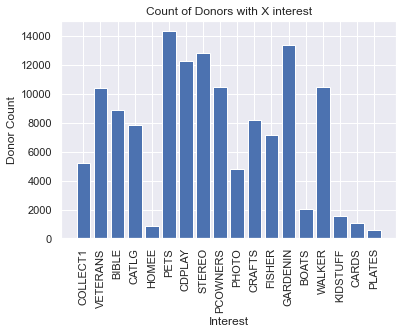

In [27]:
#Categorical/Low Cardinality variables
interests = df_preferences.loc[:,'COLLECT1':'PLATES']

#uses describe
describe = df_preferences.describe().T
values = [len(interests[interests[column] == 1]) for column in interests.columns]

#plotting
plt.bar(interests.columns, values)
plt.xticks(rotation=90)
plt.ylabel('Donor Count')
plt.xlabel('Interest')
plt.title('Count of Donors with X interest')
plt.show()

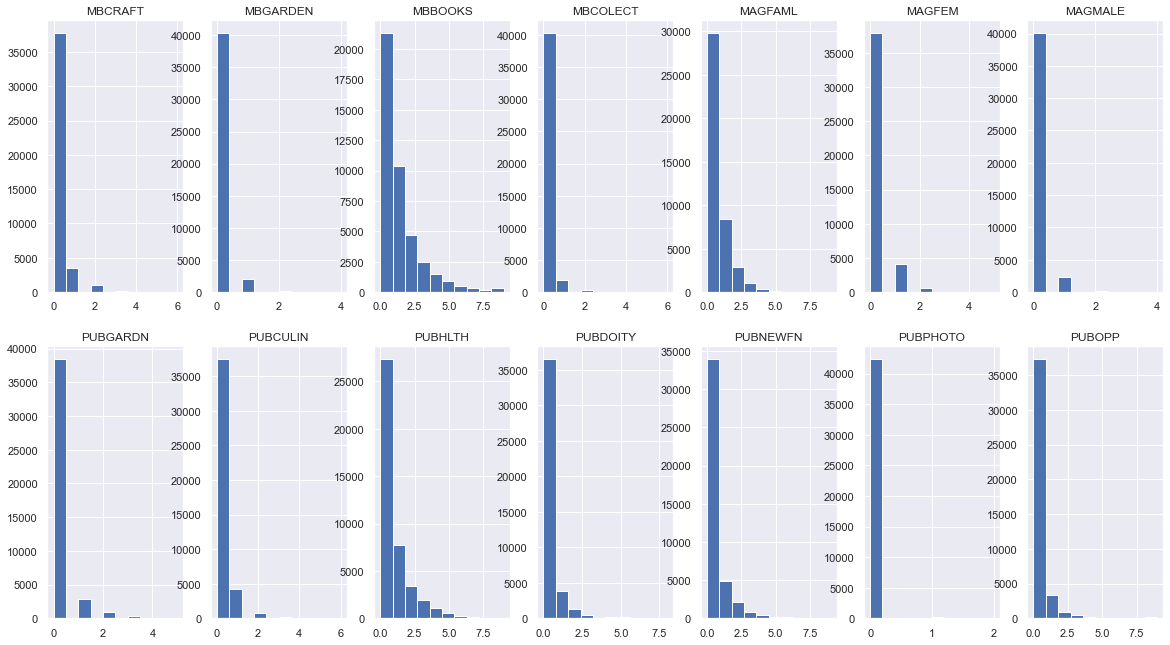

In [28]:
#Numeric variables
mail_responses = df_preferences.loc[:,'MBCRAFT':'PUBOPP']


#uses describe
describe = mail_responses.describe().T

#Plots
fig, axes = plt.subplots(2, ceil(mail_responses.shape[1] / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), mail_responses):
    ax.hist(mail_responses[feat])
    ax.set_title(feat)


plt.show()

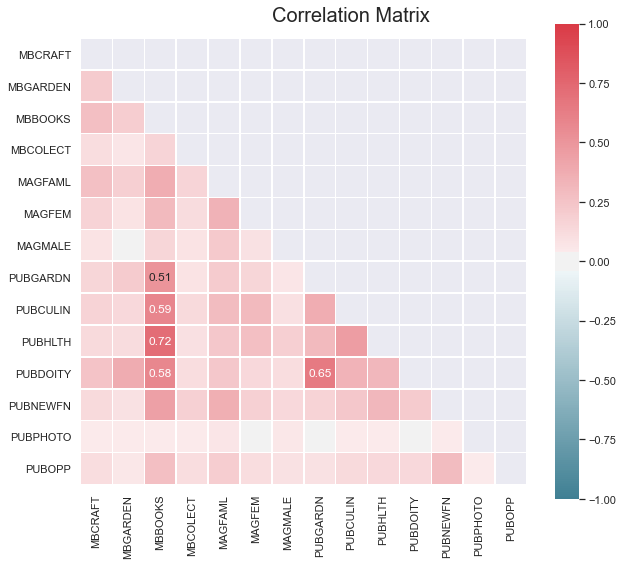

In [29]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(mail_responses.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, mask=np.triu(np.ones_like(corr.corr())) )

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

Note: gender preferences were checked and no differences in correlations were found.

# 3) Promotion / Giving History File

We will be only be working with the summary variables of the promotion history file, as well as the summary variables from the giving history file (which have proven to be highly correlated amoung themselves).

In [30]:
#gets variables corresponding to personal / Demographic Data
df_history_file = df[list(df.loc[:,'CARDPROM' : 'NUMPRM12']) + list(df.loc[:,'RAMNTALL':'AVGGIFT']) + list(df.loc[:,'RFA_2R':'MDMAUD_A']) + list(['PEPSTRFL'])] 

#checks variables
df_history_file.columns

Index(['CARDPROM', 'MAXADATE', 'NUMPROM', 'CARDPM12', 'NUMPRM12', 'RAMNTALL',
       'NGIFTALL', 'CARDGIFT', 'MINRAMNT', 'MINRDATE', 'MAXRAMNT', 'MAXRDATE',
       'LASTGIFT', 'LASTDATE', 'FISTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT',
       'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A',
       'PEPSTRFL'],
      dtype='object')

In [31]:
df_history_file.head()

,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,...,NEXTDATE,TIMELAG,AVGGIFT,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,PEPSTRFL
CONTROLN,,,,,,,,,,,,,,,,,,,,,
1,23,2017-02-01,60,5,12,273.00,12,6,10.0,2015-09-01,...,2010-01-01,3.0,22.750000,L,3,F,X,X,X,X
2,36,2017-02-01,99,9,27,157.00,16,3,5.0,2012-04-01,...,2010-02-01,4.0,9.812500,L,1,F,X,X,X,
4,39,2017-02-01,97,10,22,209.00,14,5,5.0,2010-02-01,...,2010-01-01,3.0,14.928571,L,1,F,X,X,X,X
5,19,2017-02-01,45,5,12,297.00,35,7,5.0,2012-04-01,...,2009-10-01,0.0,8.485714,L,1,F,X,X,X,X
7,40,2017-02-01,117,6,22,716.25,68,19,3.0,2013-04-01,...,2007-06-01,4.0,10.533088,L,1,E,X,X,X,X


In [32]:
#deals with ' ' spaces and converts appropriate variables to dummies
df_history_file['PEPSTRFL'].replace([" ", "X"], [0, 1], inplace=True)
df_history_file.replace(" ", np.nan, inplace=True)

In [33]:
df_history_file.isna().sum()

CARDPROM       0
MAXADATE       0
NUMPROM        0
CARDPM12       0
NUMPRM12       0
RAMNTALL       0
NGIFTALL       0
CARDGIFT       0
MINRAMNT       0
MINRDATE       0
MAXRAMNT       0
MAXRDATE       0
LASTGIFT       0
LASTDATE       0
FISTDATE       2
NEXTDATE    9973
TIMELAG     9973
AVGGIFT        0
RFA_2R         0
RFA_2F         0
RFA_2A         0
MDMAUD_R       0
MDMAUD_F       0
MDMAUD_A       0
PEPSTRFL       0
dtype: int64

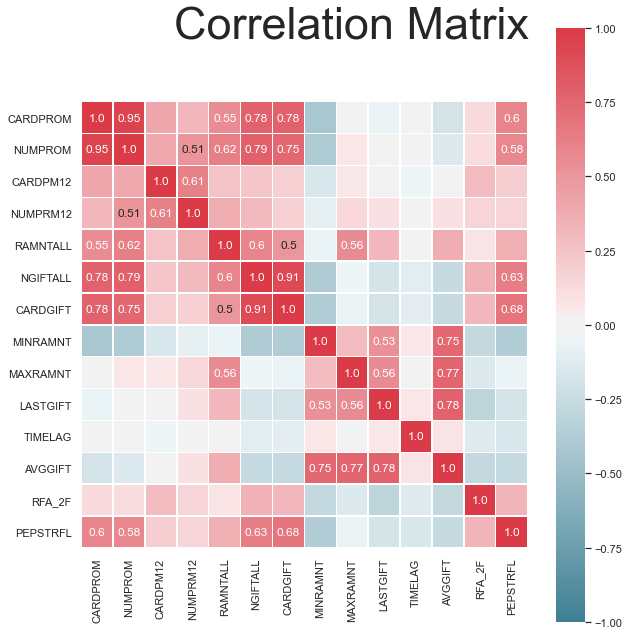

In [34]:
# Prepare figure
fig = plt.figure(figsize=(10, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_history_file.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=45)

plt.show()

Highly correlated variables (>0.8) - CARDPROM and CARDGIFT -  will be dropped as they encode redundant info.

In [35]:
df_history_file.drop(['CARDPROM', 'CARDGIFT'], axis = 1, inplace = True)

In [36]:
df_history_file.columns

Index(['MAXADATE', 'NUMPROM', 'CARDPM12', 'NUMPRM12', 'RAMNTALL', 'NGIFTALL',
       'MINRAMNT', 'MINRDATE', 'MAXRAMNT', 'MAXRDATE', 'LASTGIFT', 'LASTDATE',
       'FISTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT', 'RFA_2R', 'RFA_2F',
       'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'PEPSTRFL'],
      dtype='object')

In [37]:
#checks data info
df_history_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 1 to 191779
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MAXADATE  95412 non-null  object 
 1   NUMPROM   95412 non-null  int64  
 2   CARDPM12  95412 non-null  int64  
 3   NUMPRM12  95412 non-null  int64  
 4   RAMNTALL  95412 non-null  float64
 5   NGIFTALL  95412 non-null  int64  
 6   MINRAMNT  95412 non-null  float64
 7   MINRDATE  95412 non-null  object 
 8   MAXRAMNT  95412 non-null  float64
 9   MAXRDATE  95412 non-null  object 
 10  LASTGIFT  95412 non-null  float64
 11  LASTDATE  95412 non-null  object 
 12  FISTDATE  95410 non-null  object 
 13  NEXTDATE  85439 non-null  object 
 14  TIMELAG   85439 non-null  float64
 15  AVGGIFT   95412 non-null  float64
 16  RFA_2R    95412 non-null  object 
 17  RFA_2F    95412 non-null  int64  
 18  RFA_2A    95412 non-null  object 
 19  MDMAUD_R  95412 non-null  object 
 20  MDMAUD_F  95412 non-null  o

In [38]:
#converts date variables to datetime types
df_history_file['MAXADATE'] = pd.to_datetime(df_history_file['MAXADATE'])
df_history_file['MINRDATE'] = pd.to_datetime(df_history_file['MINRDATE'])
df_history_file['MAXRDATE'] = pd.to_datetime(df_history_file['MAXRDATE'])
df_history_file['LASTDATE'] = pd.to_datetime(df_history_file['LASTDATE'])
df_history_file['FISTDATE'] = pd.to_datetime(df_history_file['FISTDATE'])
df_history_file['NEXTDATE'] = pd.to_datetime(df_history_file['NEXTDATE'])

In [39]:
#checks data info
df_history_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 1 to 191779
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   MAXADATE  95412 non-null  datetime64[ns]
 1   NUMPROM   95412 non-null  int64         
 2   CARDPM12  95412 non-null  int64         
 3   NUMPRM12  95412 non-null  int64         
 4   RAMNTALL  95412 non-null  float64       
 5   NGIFTALL  95412 non-null  int64         
 6   MINRAMNT  95412 non-null  float64       
 7   MINRDATE  95412 non-null  datetime64[ns]
 8   MAXRAMNT  95412 non-null  float64       
 9   MAXRDATE  95412 non-null  datetime64[ns]
 10  LASTGIFT  95412 non-null  float64       
 11  LASTDATE  95412 non-null  datetime64[ns]
 12  FISTDATE  95410 non-null  datetime64[ns]
 13  NEXTDATE  85439 non-null  datetime64[ns]
 14  TIMELAG   85439 non-null  float64       
 15  AVGGIFT   95412 non-null  float64       
 16  RFA_2R    95412 non-null  object        
 17  RFA_2F    9

In [40]:
###I DON'T UNDERSTAND WHY RFA_2R is DIFFERNET FROM MDMAUD_R in the same donors... If thy're all Latent, shouldn't they be all MDMAUD Latent as well? THINK ABT THIS LATER###
df_history_file[df_history_file['MDMAUD_F'] != 'X']

,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,...,NEXTDATE,TIMELAG,AVGGIFT,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,PEPSTRFL
CONTROLN,,,,,,,,,,,,,,,,,,,,,
2115,2017-02-01,90,11,30,623.0,14,25.0,2015-02-01,75.0,2016-11-01,...,2012-05-01,6.0,44.500000,L,1,G,C,2,C,1
2987,2017-02-01,41,7,28,350.0,4,50.0,2016-12-01,100.0,2014-11-01,...,2015-05-01,6.0,87.500000,L,1,G,C,2,C,0
3166,2017-02-01,71,6,28,145.0,7,15.0,2013-09-01,25.0,2015-08-01,...,2012-05-01,3.0,20.714286,L,1,G,C,1,M,1
3291,2017-02-01,76,6,30,988.0,9,50.0,2011-03-01,200.0,2017-02-01,...,2012-01-01,10.0,109.777778,L,2,G,C,1,C,0
3304,2017-02-01,79,6,31,507.0,20,5.0,2011-06-01,100.0,2013-12-01,...,2011-05-01,3.0,25.350000,L,1,G,L,1,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189231,2017-02-01,59,6,16,875.0,7,100.0,2017-02-01,150.0,2013-10-01,...,2013-02-01,10.0,125.000000,L,2,G,C,1,C,0
189237,2017-02-01,41,6,17,620.0,5,10.0,2014-07-01,250.0,2014-12-01,...,2014-07-01,5.0,124.000000,L,1,G,L,1,C,1
189851,2017-02-01,83,7,34,679.0,16,5.0,2012-01-01,100.0,2014-12-01,...,2012-04-01,3.0,42.437500,L,2,G,C,2,C,1


45k donors being PEP Star RFA Status; this might be important for future analyses, specially giving the following:

In [41]:
df_history_file.groupby(['PEPSTRFL'])[['RAMNTALL','NGIFTALL']].sum() ##PORQUÊ?? ENCONTRAR RELAÇÃO

,RAMNTALL,NGIFTALL
PEPSTRFL,,
0,3196390.79,223873
1,6773147.18,692276


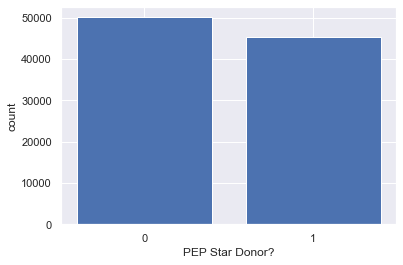

In [42]:
#plots # of PEP Star or non PEP Star donors
plt.bar(['0','1'], df_history_file['PEPSTRFL'].value_counts())

plt.ylabel('count')
plt.xlabel('PEP Star Donor?')
plt.show()

# 4) Neighborhood information - Data from Census

In [43]:
#gets variables corresponding to personal / Demographic Data
df_census = df[list(df.loc[:,'POP901' : 'AC2'])] 

#checks variables
df_census.columns

Index(['POP901', 'POP902', 'POP903', 'POP90C1', 'POP90C2', 'POP90C3',
       'POP90C4', 'POP90C5', 'ETH1', 'ETH2',
       ...
       'HC16', 'HC17', 'HC18', 'HC19', 'HC20', 'HC21', 'MHUC1', 'MHUC2', 'AC1',
       'AC2'],
      dtype='object', length=286)

In [44]:
#WORK ON THIS FURTHER#

# FURTHER DATA EXPLORATION & VISUALIZATION

Associations between personal data and giving/gift history and, alter, the census data will be investigated here:

In [45]:
#start by combining previously CLEANED sub-datasets:
df_processed = df_personal.join(df_history_file)

In [46]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 1 to 191779
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATE      95412 non-null  object        
 1   ZIP        95412 non-null  object        
 2   PVASTATE   95412 non-null  int64         
 3   DOMAIN     93096 non-null  object        
 4   HOMEOWNR   73184 non-null  float64       
 5   INCOME     74126 non-null  float64       
 6   GENDER     90371 non-null  float64       
 7   HIT        95412 non-null  int64         
 8   MALEMILI   95412 non-null  int64         
 9   MALEVET    95412 non-null  int64         
 10  VIETVETS   95412 non-null  int64         
 11  WWIIVETS   95412 non-null  int64         
 12  LOCALGOV   95412 non-null  int64         
 13  STATEGOV   95412 non-null  int64         
 14  FEDGOV     95412 non-null  int64         
 15  SOLP3      95412 non-null  object        
 16  SOLIH      95412 non-null  object      

Visualize some important variables:

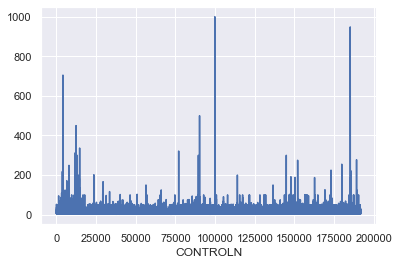

In [47]:
df_processed['AVGGIFT'].plot()

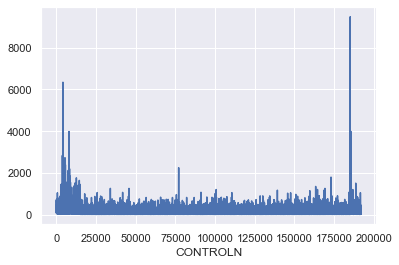

In [48]:
df_processed['RAMNTALL'].plot()

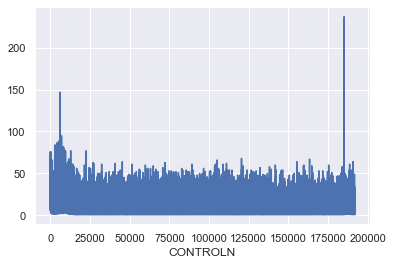

In [49]:
df_processed['NGIFTALL'].plot()

In [60]:
#split between numeric features and categorical/low cardinality features
numeric_variables = list(df_processed.select_dtypes(exclude=['object', 'datetime']).columns)
non_numeric_variables = list(df_processed.select_dtypes(exclude=['float', 'int']).columns)

#removes dummies from numeric_variables and includes them in non_numerical_variables, coz they're categorical even though they're int of float type
dummmy_variables = ['PVASTATE', 'HOMEOWNR', 'INCOME', 'GENDER', 'WEALTH', 'HPHONE_D', 'RFA_2F', 'PEPSTRFL']
numeric_variables = [element for element in numeric_variables if element not in dummmy_variables]
non_numeric_variables.extend(dummmy_variables)

In [ ]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(numeric_variables) / 4), figsize=(20, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), numeric_variables): # Notice the zip() function and flatten() method
    ax.hist(df_processed[feat])
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

In [ ]:
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(numeric_variables) / 4), figsize=(20, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), numeric_variables): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_processed[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [ ]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df_processed[numeric_variables], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(25, 25))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_processed[numeric_variables].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=45)

plt.show()

Number of card promotions received is redundant (corr > 0.8) with antiquenessness of the donors (=Longevity); Longevity will be then dropped.

In [ ]:
df_processed.drop(['LONGEVITY'], axis = 1, inplace = True) #what more to drop?

For categorical / low cardinality features:

In [101]:
###EXPLORE THIS FURTHER

Distribution of donors by state:

In [ ]:
###ADICIONAR CÓDIGO MAPAS JOANA

Distribution of donors by gender:

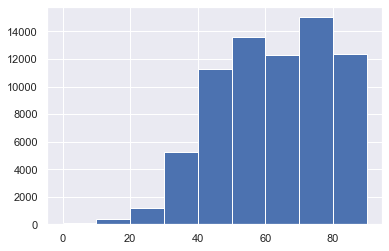

In [104]:
plt.hist(df_processed.AGE, bins=[0,10,20,30,40,50,60,70,80,90])
plt.show()

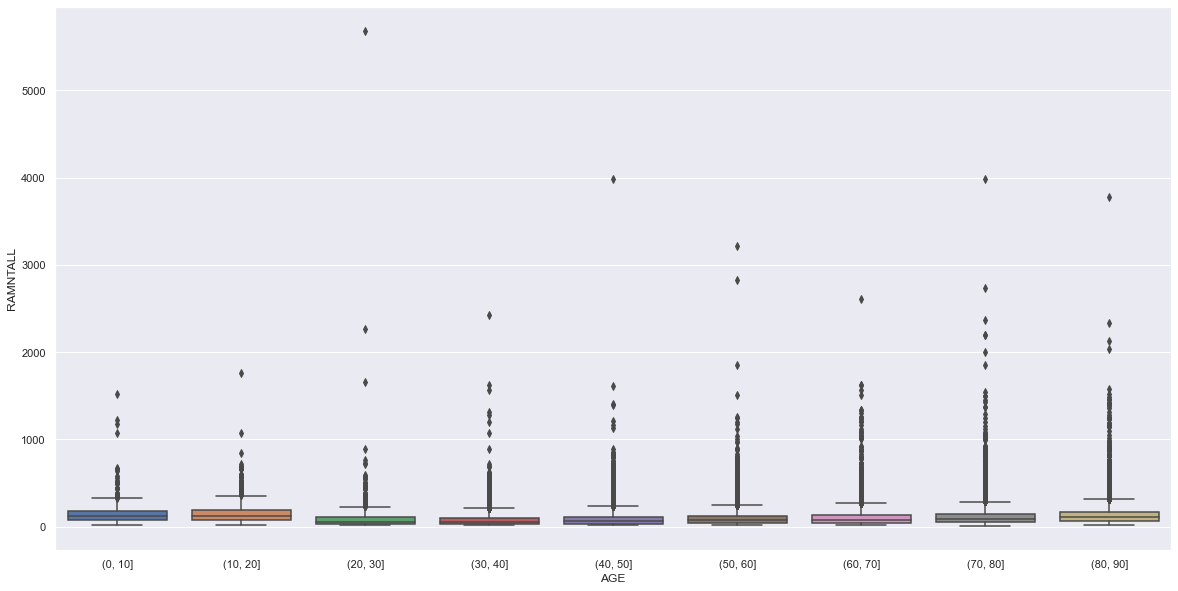

In [107]:
age_bins = pd.cut(df_processed.AGE, [0,10,20,30,40,50,60,70,80,90])

plt.figure(figsize=(20,10))
sns.boxplot(x = age_bins, y = "RAMNTALL", data=df_processed)
plt.show()

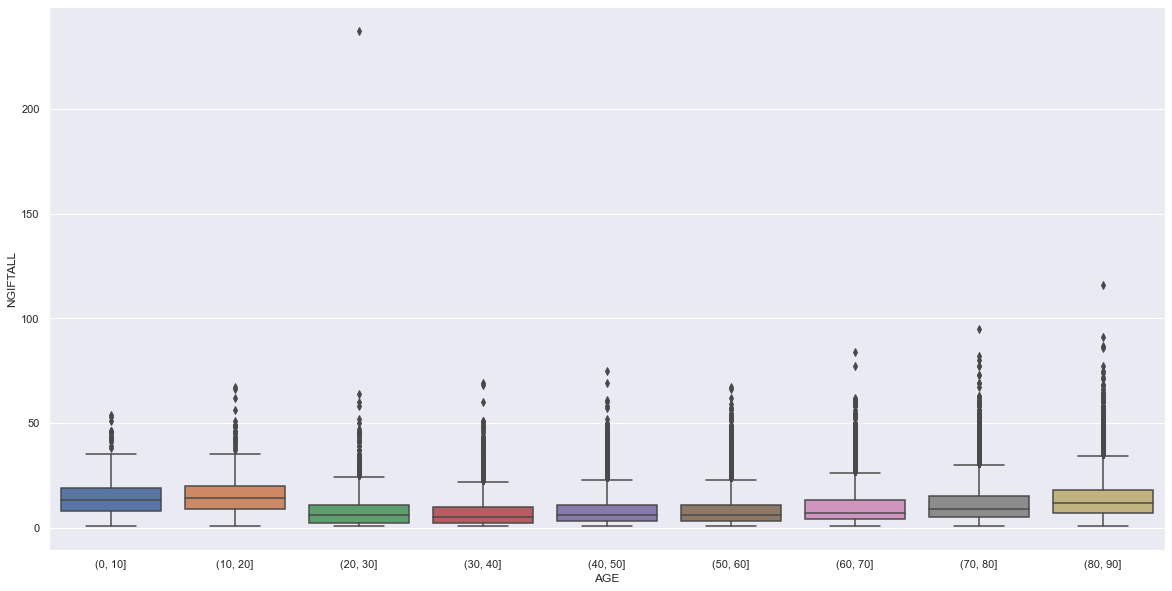

In [110]:
plt.figure(figsize=(20,10))
sns.boxplot(x = age_bins, y = "NGIFTALL", data=df_processed)
plt.show()

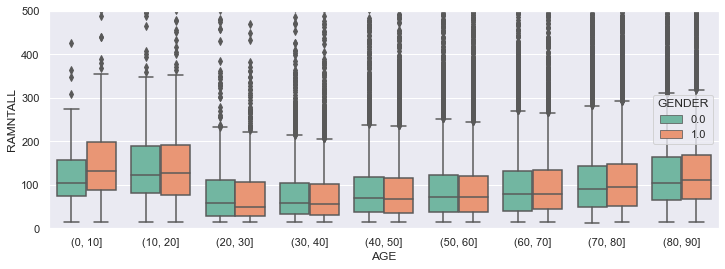

In [116]:
plt.figure(figsize=(12, 4))
plt.ylim([0,500]) #remove outliers
sns.boxplot(x = age_bins, y = "RAMNTALL", hue = "GENDER", data=df_processed, palette="Set2")
plt.show()

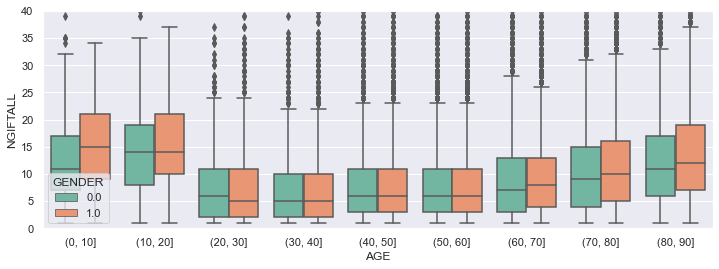

In [117]:
plt.figure(figsize=(12, 4))
plt.ylim([0,40])
sns.boxplot(x = age_bins, y = "NGIFTALL", hue = "GENDER", data=df_processed, palette="Set2");

Gender differences by state:

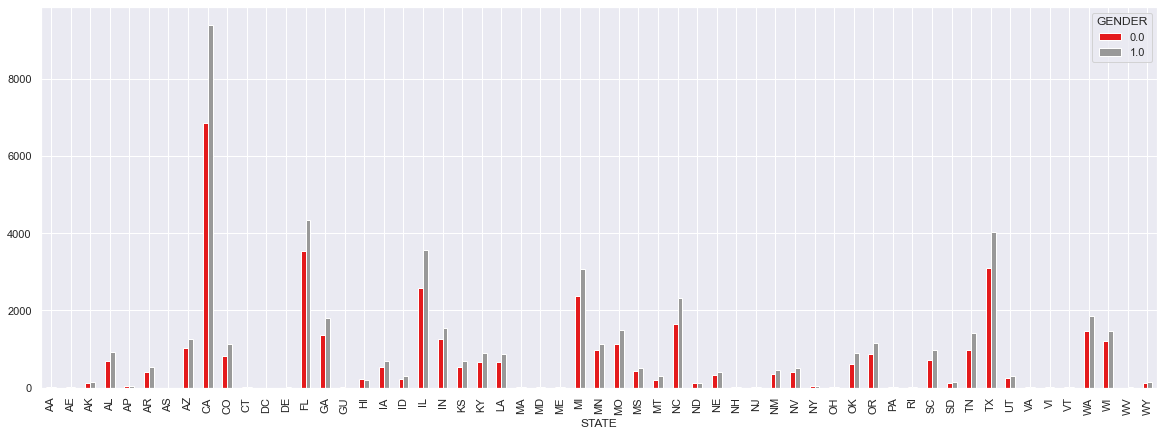

In [100]:
gender_state=df_processed.groupby(["STATE","GENDER"]).size().reset_index()
gender_state=pd.pivot_table(gender_state,values=0,index="STATE",columns="GENDER")
gender_state.plot(kind="bar", figsize =[20,7], colormap ="Set1")